# Vježbe 2 - dio 2

 - Ponavljanje perceptron algoritma
 - Primjena implementiranog algoritma iz scikit-learn biblioteke

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.linear_model import Perceptron

plt.rcParams["figure.figsize"] = (10, 10)

 - Zadani su podaci $\{x^{(1)}, x^{(2)}, \dots, x^{(m)}\} \subset \mathbb{R}^{n}$ i pripadne oznake/klase $y_i \in \{-1, 1\}$. 
 - Ideja perceptron algoritma je pronaći **hiperravninu** (potprostor dimenzije $n-1$) takav da se svi podaci s oznakom $1$ nalaze s jedne strane, a ostali s druge strane hiperravnine.
 - Hiperravnina je definirana vektorom $\Theta = [\theta_1, \dots, \theta_n]^T \in \mathbb{R}^n$ koji opisuje hiperravninu jednadžbom
 $$
 \Theta^Tx = \theta_1x_1 + \dots + \theta_nx_n = 0.
 $$
 - Ovako definirana hiperravnina očito prolazi kroz ishodište. Hiperravnina koja ne prolazi kroz ishodište ima dodatni *bias* parametar $\theta_0$ (kao i u modelu linearne regresije), a jednadžba postaje
 $$
 \theta_0 + \Theta^Tx = \theta_0 + \theta_1x_1 + \dots + \theta_nx_n = 0.
 $$
 - Za točke $x \in \mathbb{R}^n$ s oznakom 1 (s "gornje" strane hiperravnine) vrijedi $\theta_0 + \Theta{}x > 0$, dok je za ostale $\theta_0 + \Theta{}x < 0$.
 - Vektor $\Theta$ je vektor normale na dobivenu hiperravninu.
 - U slučaju kad su točke $x^{(i)} \in \mathbb{R}^2$, hiperravnina koju tražimo je **pravac** opisan jednadžbom
 $$
 \theta_0 + \theta_1x + \theta_2y = 0,
 $$
 odnosno
 $$
 y = -\frac{\theta_1}{\theta_2}x - \frac{\theta_0}{\theta_2},
 $$
 ako je $\theta_2 \neq 0$.

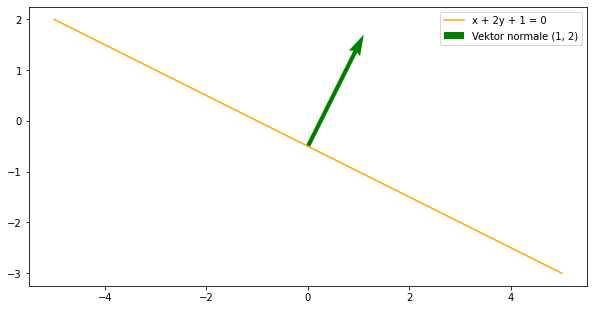

In [7]:
# Pogledajmo slučaj gdje je hiperravnina pravac
theta_0 = 1
theta = np.array([1,2])
xx = np.linspace(-5,5,100)
yy = -(theta[0]/theta[1])*xx-(theta_0/theta[1])
plt.plot(xx,yy,color='orange',label='hiperravnina/pravac')
# sa metodom quiver crtamo 'vektor', th. duzinu sa strelicom
plt.quiver(0,-0.5, theta[0],theta[1],color=['green'],scale=10, label='theta')

plt.legend(['x + 2y + 1 = 0', 'Vektor normale (1, 2)'])
plt.gca().set_aspect('equal') #postavljamo skalu po x i y da budu jednake na taj nacin dobijemo da je vektor normale okomit na pravac 
plt.show()

Linearno separabilne podatke možemo kreirati s funkcijom [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html).

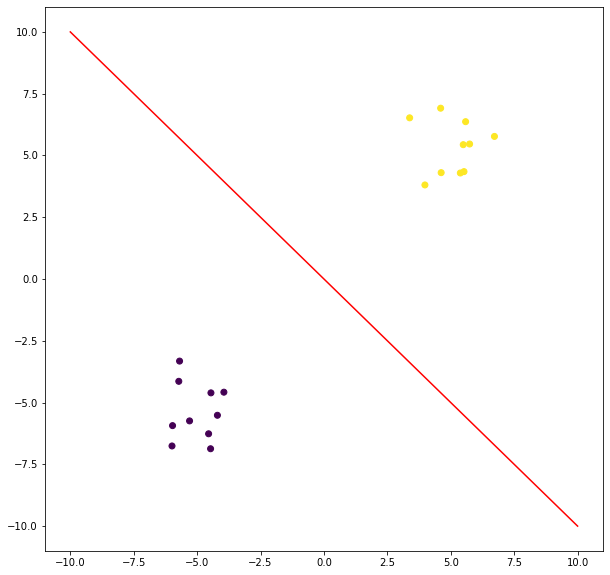

In [8]:
X, y = make_blobs(n_samples=20, n_features=2, centers=[(-5, -5), (5, 5)])
y[y==0] = -1
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(np.linspace(-10, 10, 100), -np.linspace(-10, 10, 100), color='red')
plt.show()

In [11]:
theta= np.array([1,1])
for i,x in enumerate(X):
    print(f'Tocka{x}\nPredikcija: {np.sign(np.dot(theta,x))}\nKlasa: {y[i]}')

Tocka[5.37749472 4.29027065]
Predikcija: 1.0
Klasa: 1
Tocka[4.62106762 4.30381191]
Predikcija: 1.0
Klasa: 1
Tocka[-4.45552465 -4.60789922]
Predikcija: -1.0
Klasa: -1
Tocka[4.60083442 6.91264718]
Predikcija: 1.0
Klasa: 1
Tocka[-5.99054353 -6.75709588]
Predikcija: -1.0
Klasa: -1
Tocka[-4.54762408 -6.2641826 ]
Predikcija: -1.0
Klasa: -1
Tocka[-5.72310729 -4.14090957]
Predikcija: -1.0
Klasa: -1
Tocka[3.98117546 3.80632357]
Predikcija: 1.0
Klasa: 1
Tocka[6.72222722 5.77036454]
Predikcija: 1.0
Klasa: 1
Tocka[5.52120896 4.34582376]
Predikcija: 1.0
Klasa: 1
Tocka[5.49206891 5.43646135]
Predikcija: 1.0
Klasa: 1
Tocka[-4.46969057 -6.86968206]
Predikcija: -1.0
Klasa: -1
Tocka[-5.96914506 -5.93392269]
Predikcija: -1.0
Klasa: -1
Tocka[3.37871336 6.5224405 ]
Predikcija: 1.0
Klasa: 1
Tocka[-5.69246812 -3.32236365]
Predikcija: -1.0
Klasa: -1
Tocka[-5.29835241 -5.74285566]
Predikcija: -1.0
Klasa: -1
Tocka[-3.94499208 -4.58071912]
Predikcija: -1.0
Klasa: -1
Tocka[5.58521287 6.36717076]
Predikcija: 1.0
K

---
## Zadatak 1
Pomoću perceptrona implementirajte logičke OR, AND, XOR

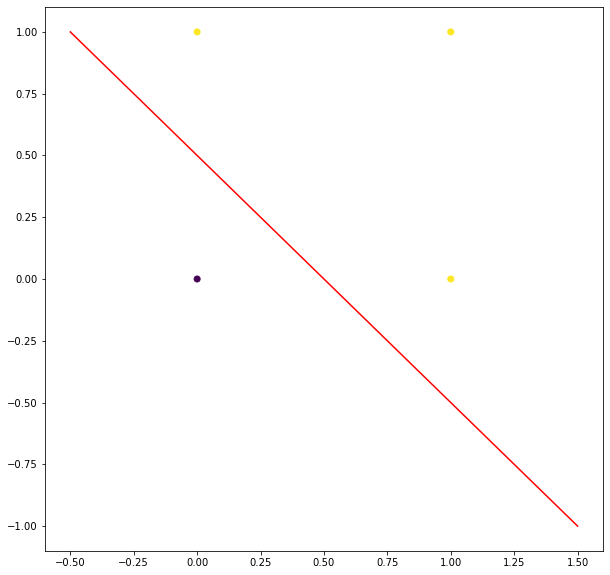

In [15]:
# OR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,1,1,1])

theta_0 = -0.5
theta = np.array([1, 1])
xx = np.linspace(-0.5, 1.5, 100)
yy = -(theta[0] / theta[1]) * xx - theta_0 / theta[1]

plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, color='red')

plt.show()

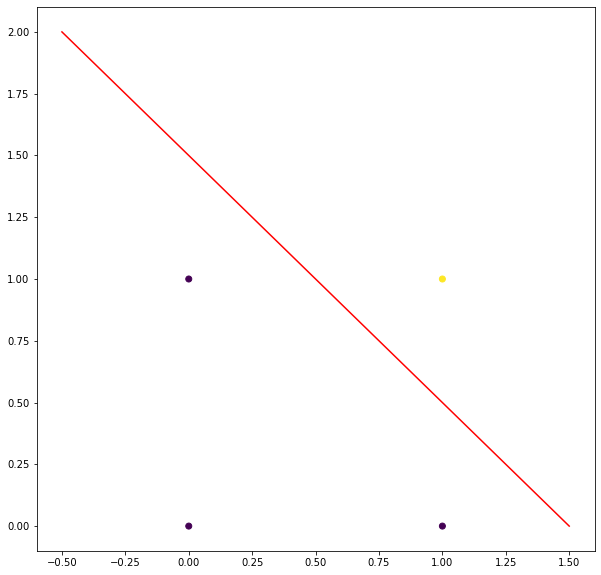

In [21]:
# AND
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,-1,-1,1])
theta_0 = -1.5 #kako smo mi tu odredili ove theta ?
theta = np.array([1, 1])
xx = np.linspace(-0.5, 1.5, 100)
yy = -(theta[0] / theta[1]) * xx - theta_0 / theta[1]

plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(xx,yy,color='red')
plt.show()

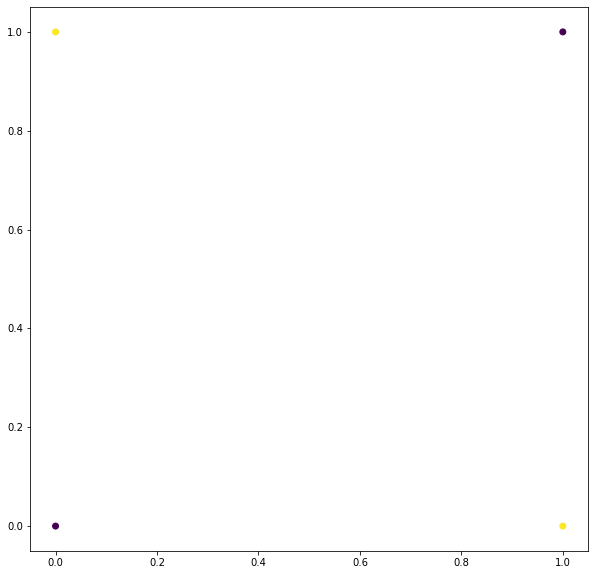

In [18]:
# XOR
X = np.array([[0,0],[0,1],[1,0], [1,1]])
y = np.array([-1,1,1,-1])
plt.scatter(X[:,0], X[:,1], c=y)

plt.show()

## Perceptron klasa
 - Danas ćemo se upoznati s Perceptron klasom ugrađenom u scikit-learn
 - Detalje o klasi možete pronaći u [scikit-learn dokumentaciji](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html).
 - Za domaću zadaću ćete sami morati implementirati perceptron algoritam

[[ 4.74443404 -6.36295109]
 [ 4.6426177  -5.59844668]
 [-5.65036308  5.51861277]
 ...
 [-5.14651433  5.47984051]
 [ 5.32134163 -5.17449987]
 [-3.79667132  5.32698219]]


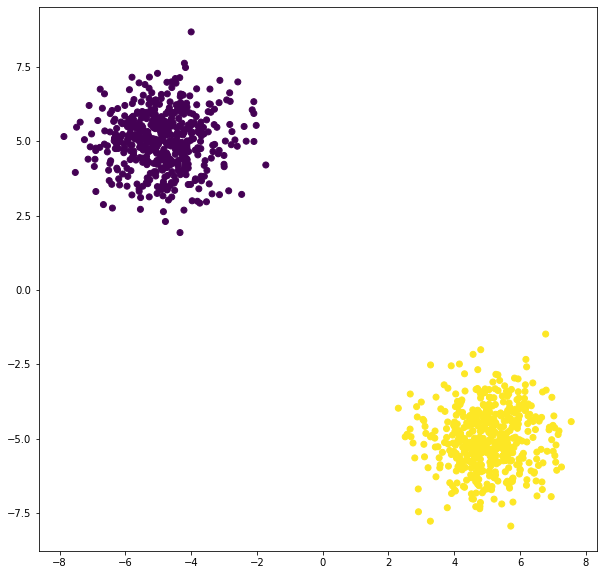

In [32]:
X,y = make_blobs(n_samples=1000, n_features=2, centers=[(-5,5),(5,-5)])
y[y==0] = -1 #koristi se cisto da zamenimo nule s minus 1 
#print(y)
print(X)
plt.scatter(X[:,0],X[:,1],c=y)


In [31]:
model = Perceptron(fit_intercept=True)
model.fit(X,y)
model.coef_,model.intercept_


(array([[ 6.90820217, -4.62626851]]), array([1.]))

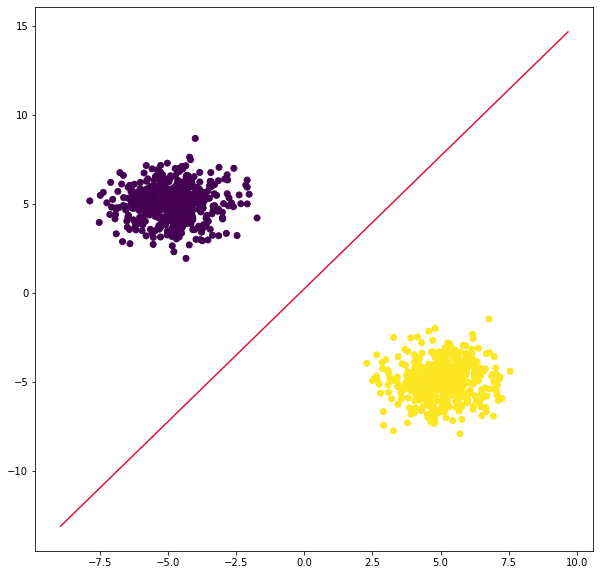

In [33]:
xx = np.linspace(np.min(X)-1, np.max(X)+1, 1000)
yy = -(model.coef_[0][0] / model.coef_[0][1]) * xx - (model.intercept_ / model.coef_[0][1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, color='crimson')
plt.show()

Što ako podatke ne možemo separirati pravcem koji prolazi ishodištem?

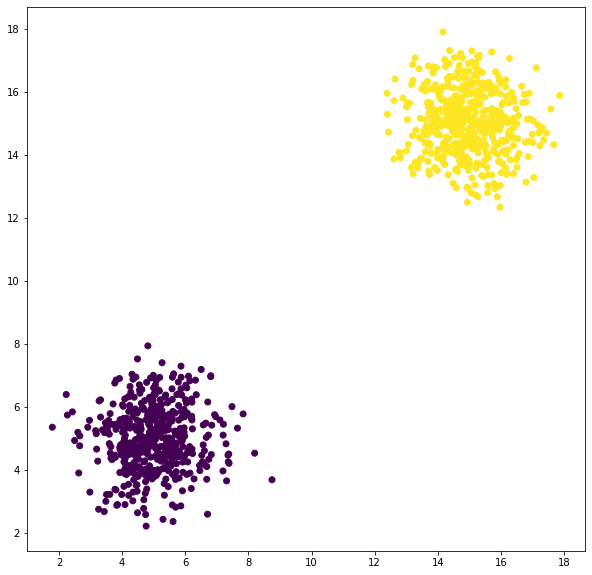

In [34]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[(5, 5), (15, 15)])
y[y==0] = -1
plt.scatter(X[:,0], X[:,1], c = y)
plt.show()

In [40]:
model = Perceptron(fit_intercept=True)
model.fit(X, y)
model.coef_, model.intercept_
model.score(X, y)

(array([[1.01396849, 1.91133925]]), array([-21.]))

In [45]:
model = Perceptron(fit_intercept=False)
model.fit(X, y)
model.coef_, model.intercept_
model.score(X, y)

0.5

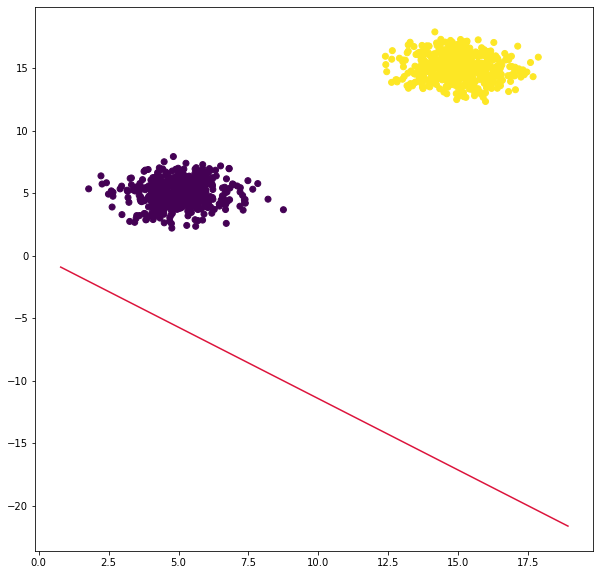

In [46]:
xx = np.linspace(np.min(X)-1, np.max(X)+1, 1000)
yy = -(model.coef_[0][0] / model.coef_[0][1]) * xx - (model.intercept_ / model.coef_[0][1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, color='crimson')
plt.show()

Što ako podaci nisu linearno separabilni?

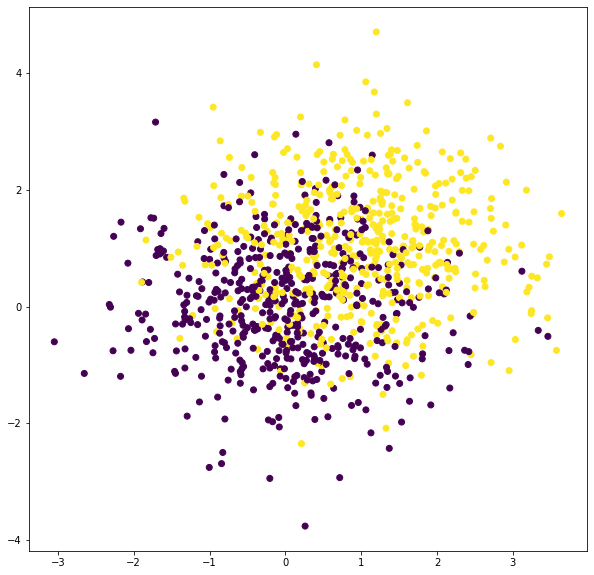

In [47]:
X, y = make_blobs(n_samples=1000, n_features=2, centers=[(0, 0), (1, 1)])
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

In [48]:
model = Perceptron(fit_intercept=True) #fit>intercept radi na foru da nemora pravac prolaziti kroz ishodiste tu 
model.fit(X, y)
model.coef_, model.intercept_

(array([[0.15259358, 1.79451894]]), array([0.]))

In [49]:
model.score(X, y)


0.658

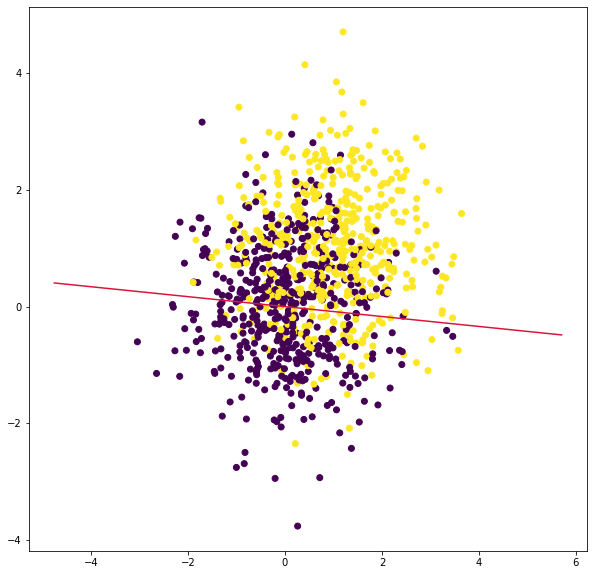

In [50]:
xx = np.linspace(np.min(X)-1, np.max(X)+1, 1000)
yy = -(model.coef_[0][0] / model.coef_[0][1]) * xx - (model.intercept_ / model.coef_[0][1])
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(xx, yy, color='crimson')
plt.show()